In [2]:
import pickle
import pandas

In [22]:
from collections import defaultdict

In [3]:
PATH = 'attention_Test_step_000004.pickle'

In [47]:
with open(PATH, 'rb') as f:
    inputs, attention_layers = pickle.load(f)

In [48]:
inputs

{'sess_pid_seq': array([[ 3231,  2415, 23793,  2956,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [  427,  2250,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [ 4851,   158,   365,   399,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]]),
 'sess_ccid_seq': array([[  8,   8,   8,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [131, 131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [131,  10,  10,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0]], dtype=int32),
 'sess_csid_seq': array([[ 8,  8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [52]:
inputs_session = {k: list(inputs[k]) for k in inputs}
inputs_session

{'sess_pid_seq': [array([ 3231,  2415, 23793,  2956,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
  array([ 427, 2250,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0]),
  array([4851,  158,  365,  399,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0])],
 'sess_ccid_seq': [array([8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=int32),
  array([131, 131,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0], dtype=int32),
  array([131,  10,  10,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0], dtype=int32)],
 'sess_csid_seq': [array([8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=int32),
  array([3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [54]:
len(attention_layers)

2

In [108]:
attention_layers[0].shape

(3, 4, 19, 19)

## Visualizing Attention weights
Reference: https://towardsdatascience.com/beyond-classification-with-transformers-and-hugging-face-d38c75f574fb

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
CMAP = sns.light_palette("blue")

%matplotlib inline

In [91]:
position_labels = list(range(19))

In [116]:
def get_attentions(outputs, layer=0, attention_head=0, sample_id=0, average_over=None):
  '''
  get the particular output for a particular layer and attention head
  layer -> 0 to 11
  attention_head -> 0 to 11
  '''

  if average_over is None:
      #return values for a particular attention head inside a specific layer, for a sample in the batch
      return outputs[layer][sample_id][attention_head]

  if average_over == 'heads':
    #avg over all heads for the first sample
    return outputs[layer][sample_id].mean(axis=1)

  if average_over == 'samples':
    #avg over all samples
    return outputs[layer].mean(axis=0)[attention_head]

  if average_over == 'samples_and_heads':
    #avg over all samples attention heads in a layer
    return outputs[layer].mean(axis=(0,1))

  #return values for a particular attention head inside a specific layer
  return outputs[layer][0][attention_head]

def plt_attentions(mat, labs, fig_size=(5,5), annot=False, cmap = CMAP, title=None):
  '''
  plot the NxN matrix passed as a heat map
  
  mat: square matrix to visualize
  labs: labels for xticks and yticks (the tokens in our case)
  '''
  fig, ax = plt.subplots(figsize=fig_size) 
  ax = sns.heatmap(mat, annot=annot, yticklabels=labs,xticklabels=labs, cmap=cmap)
  ax.xaxis.set_ticks_position('top')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  if title:
    ax.set_title(title)   

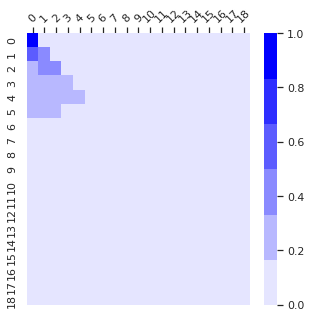

In [119]:
plt_attentions(get_attentions(attention_layers, layer=0, attention_head=0, average_over='samples'), 
               position_labels) 

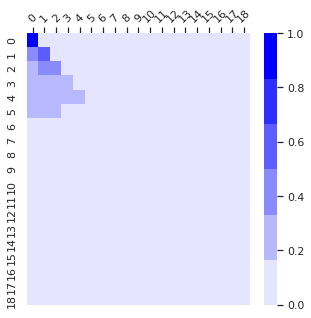

In [117]:
plt_attentions(get_attentions(attention_layers, layer=0, attention_head=0, average_over='samples_and_heads'), 
               position_labels) 

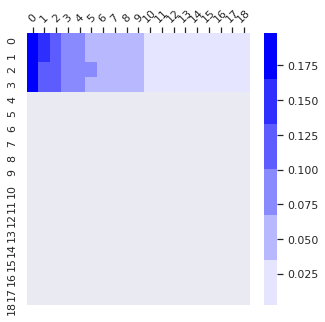

In [118]:
plt_attentions(get_attentions(attention_layers, layer=0, attention_head=0, sample_id=0, average_over='heads'), 
               position_labels) 

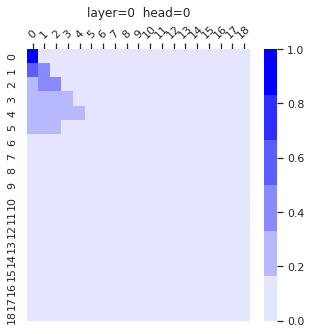

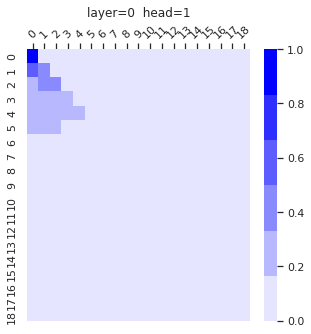

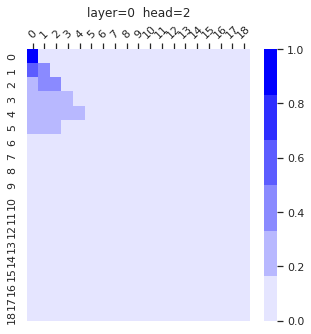

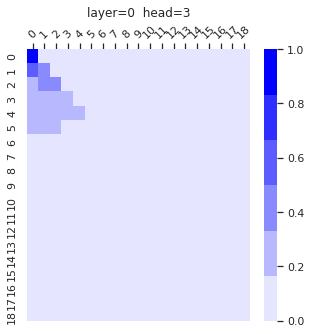

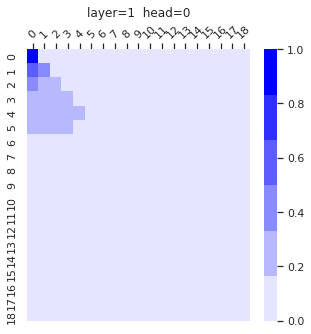

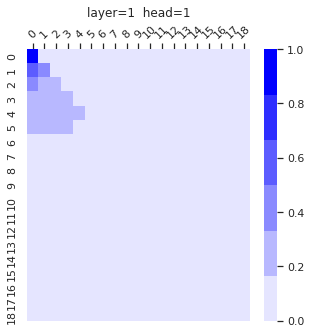

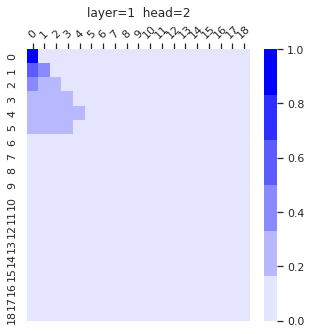

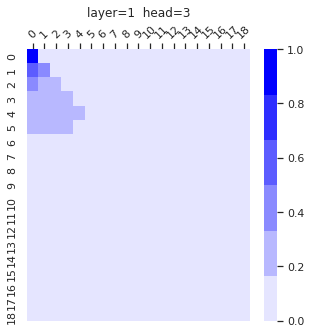

In [123]:
position_labels = list(range(19))

for layer_id in range(len(attention_layers)):
    for attention_head in range(attention_layers[layer_id].shape[1]):
        plt_attentions(get_attentions(attention_layers, 
                                      layer=layer_id, average_over='samples'), 
                       position_labels, title='layer={}  head={}'.format(layer_id, attention_head))